# Pixar-style Avatar Generator

In this notebook shows how to create an avatart in the style of Pixar cartoons, from a given a portrait photo.

In [1]:
import torch
from diffusers.utils import make_image_grid

from avatar_generator import PixarAvatarGenerator
from image_utils import extract_image

## Load your image first
it can be a path to a local file or an image URL.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


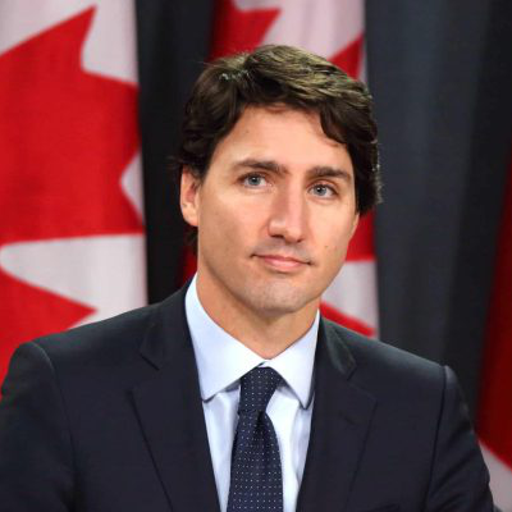

In [ ]:
url = "./images/trudeau.jpeg"
init_image = extract_image(url, crop="center")
init_image

## Generate your avatar

Some weights of the model checkpoint were not used when initializing CLIPTextModelWithProjection: 
 ['text_model.embeddings.position_ids']


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

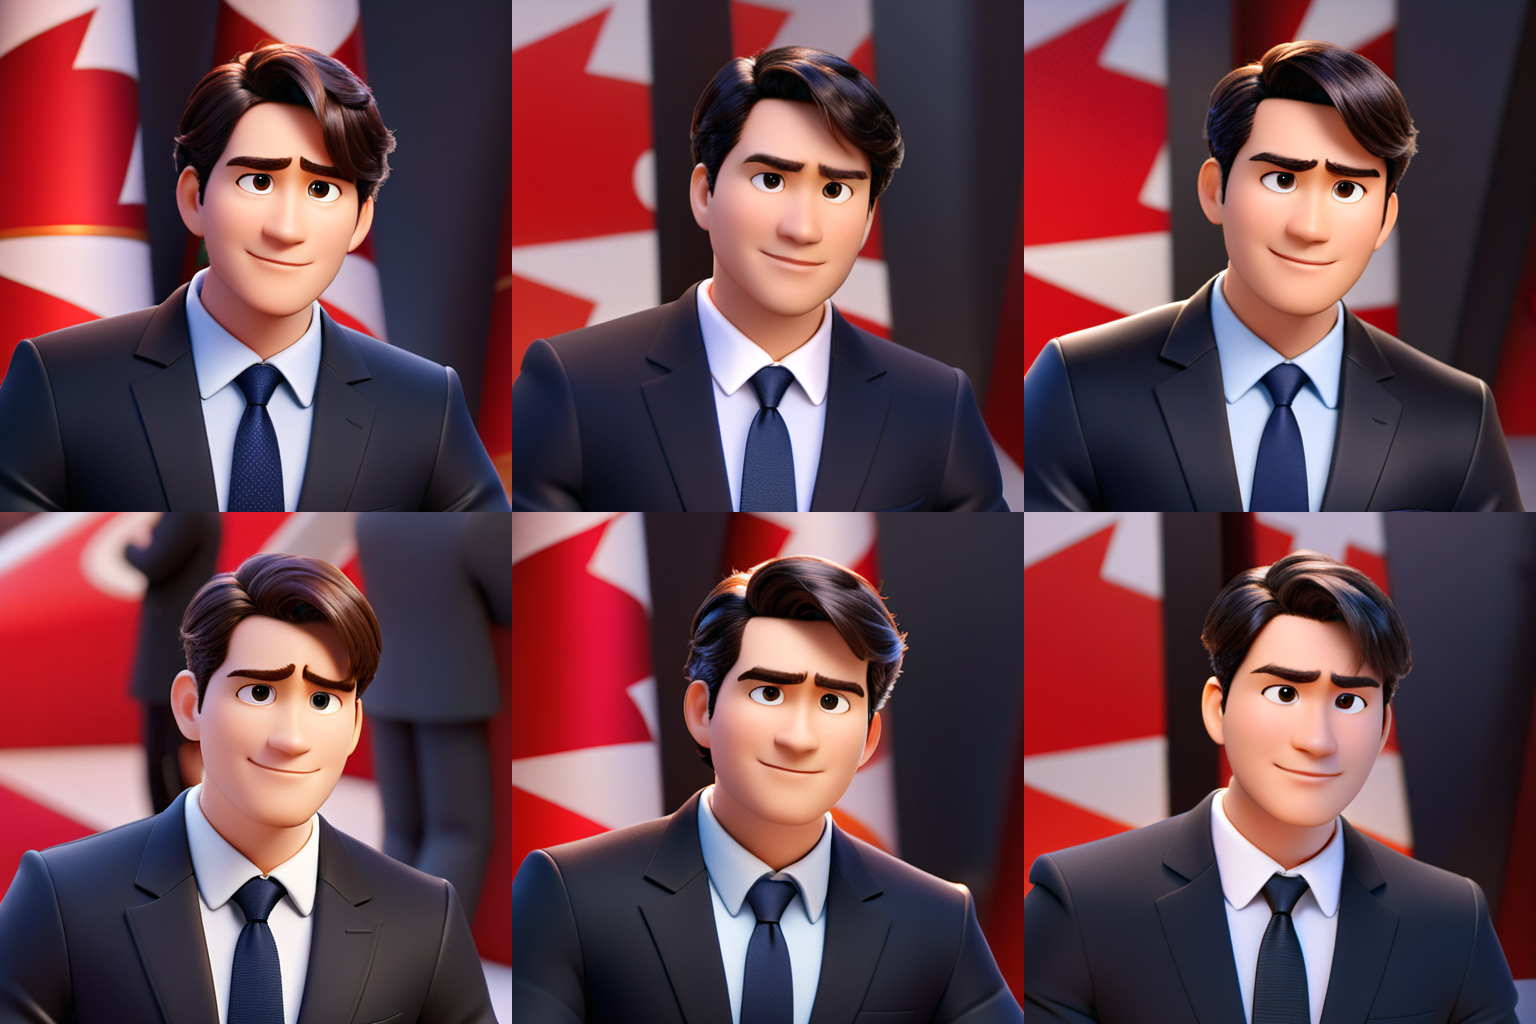

In [6]:
avatar_generator = PixarAvatarGenerator()

avatars = avatar_generator.generate_multiple_avatars(init_image, num_avatars=6)

make_image_grid(avatars, rows=2, cols=3)

# More personalized avatar generation
If you create the avatar generator with `generate_prompt_from_image=True`, it will analyze the input image under the hood and create a text prompt that helps generate an avatar that is more faithful to the input image. 
However, this comes at a cost of making the generation process slower.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


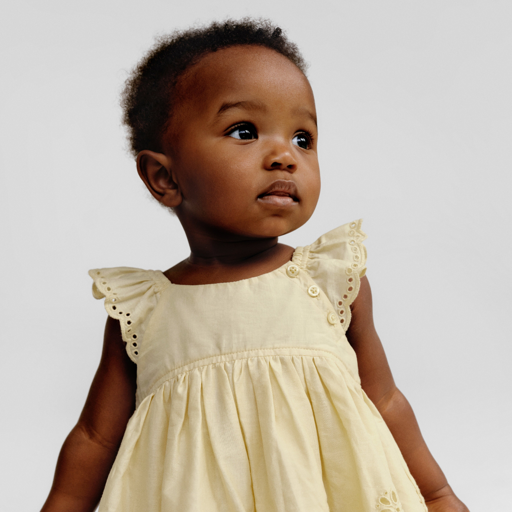

In [13]:
# enable autoreload
%load_ext autoreload
%autoreload 2

import torch
from diffusers.utils import make_image_grid
from image_utils import extract_image


url = "https://gapprod.a.bigcontent.io/v1/static/SP246572_NA_img_MOB"
init_image = extract_image(url, crop="top")
init_image

Some weights of the model checkpoint were not used when initializing CLIPTextModelWithProjection: 
 ['text_model.embeddings.position_ids']
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

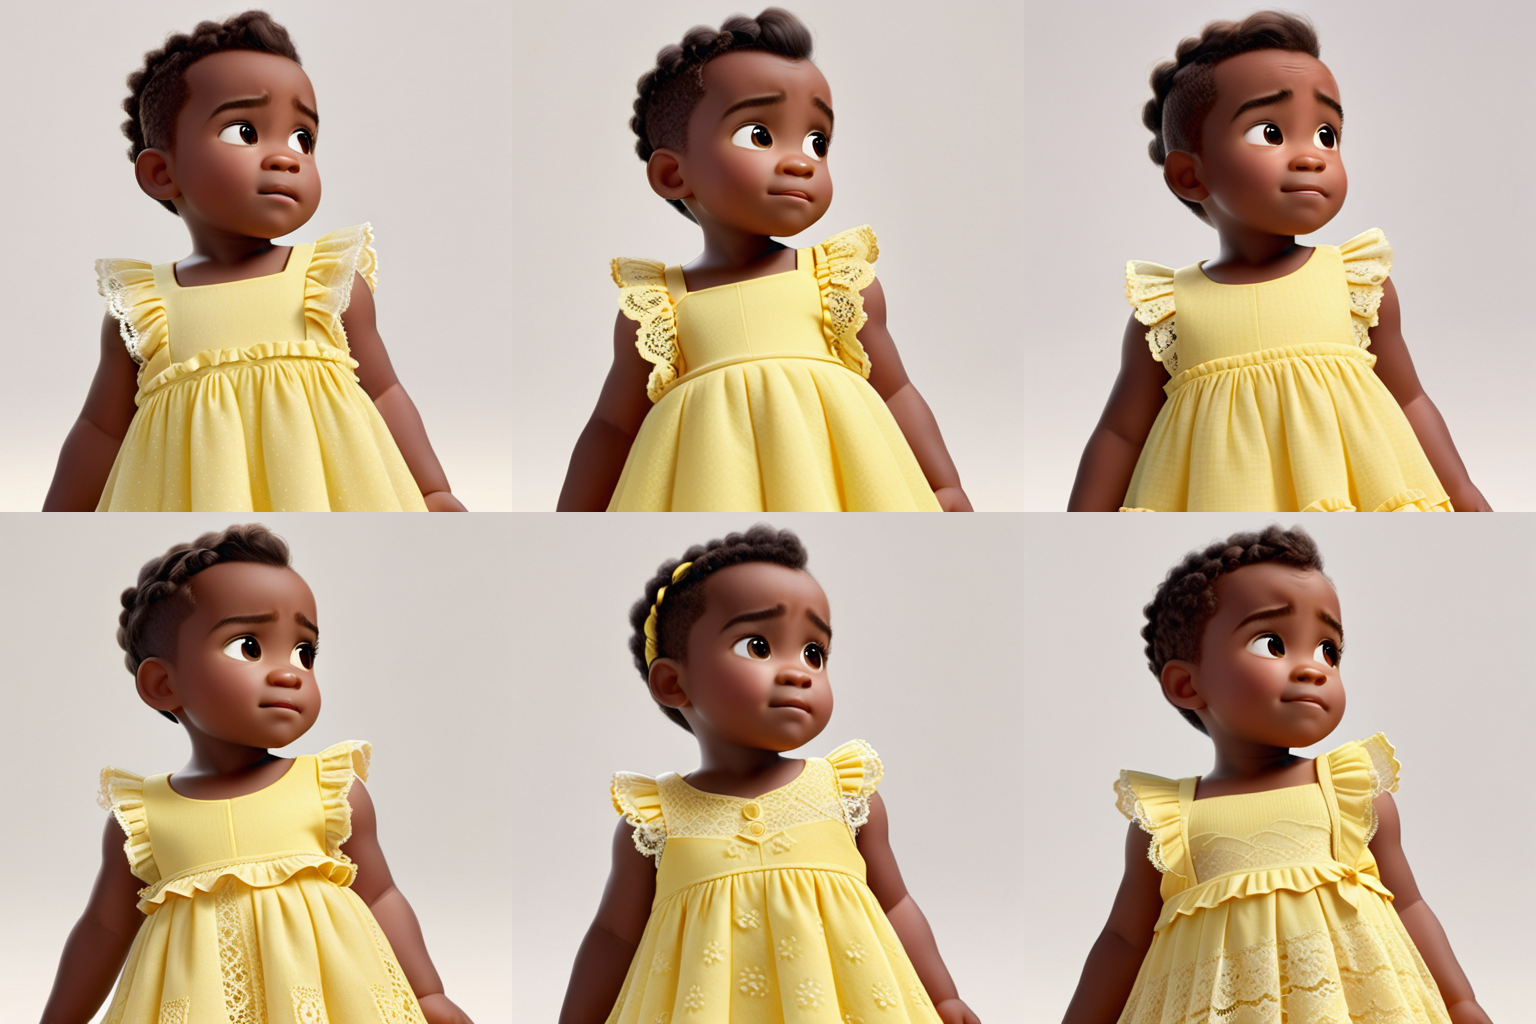

In [15]:
# a hack to load a new model withour running into cuda OOM
avatar_generator = None
with torch.no_grad():
    torch.cuda.empty_cache()

avatar_generator = PixarAvatarGenerator(generate_prompt_from_image=True)

avatars = avatar_generator.generate_multiple_avatars(init_image, num_avatars=6)

make_image_grid(avatars, rows=2, cols=3)